# Chapter 8: How to analyze the data

In [1]:
import pandas as pd
import seaborn as sns

In [3]:
# make sure pickle5 is installed, this gets complicated
# as some pickle versions are not backward compatible
!pip install pickle5

     |████████████████████████████████| 256 kB 13.3 MB/s 


In [4]:
import pickle5 as pickle

In [5]:
# Read the data from the file - using fires_cleaned, this may take a few minutes due to large file
# the result will be a dataframe
with open('cars.pkl', 'rb') as fid:
     cars = pickle.load(fid)

In [ ]:
# cars = pd.read_pickle('cars.pkl')

## How to melt columns to create long data

In [7]:
cars.head()

,aspiration,carbody,enginesize,curbweight,price
0,std,convertible,130,2548,13495.0
1,std,convertible,130,2548,16500.0
2,std,hatchback,152,2823,16500.0
3,std,sedan,109,2337,13950.0
4,std,sedan,136,2824,17450.0


In [8]:
cars_melted = pd.melt(cars, id_vars='price',
                      value_vars=['enginesize','curbweight'],
                      var_name='feature', value_name='featureValue')
cars_melted

,price,feature,featureValue
0,13495.0,enginesize,130
1,16500.0,enginesize,130
2,16500.0,enginesize,152
3,13950.0,enginesize,109
4,17450.0,enginesize,136
...,...,...,...
405,16845.0,curbweight,2952
406,19045.0,curbweight,3049
407,21485.0,curbweight,3012
408,22470.0,curbweight,3217


## How to plot melted columns

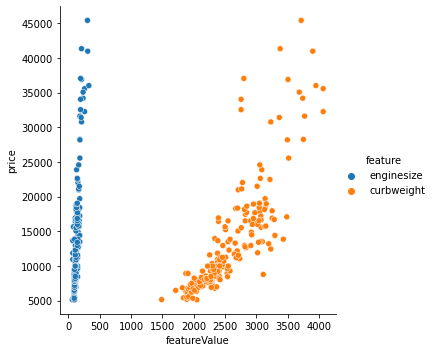

In [9]:
sns.relplot(data=cars_melted, x='featureValue', y='price', 
            hue='feature')

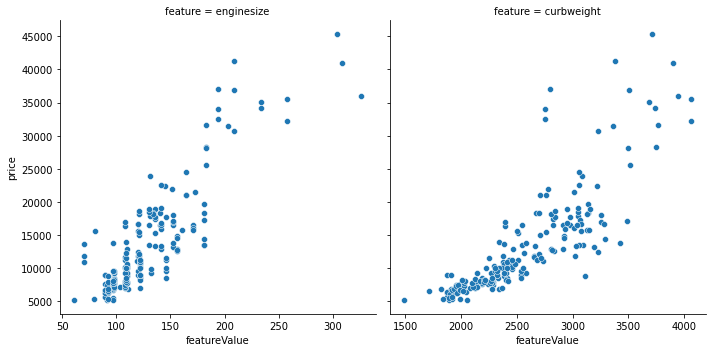

In [10]:
sns.relplot(data=cars_melted, x='featureValue', y='price', 
            col='feature', facet_kws={'sharex':False})

## How to group and apply a single aggregate method

In [13]:
# get the data
# Read the data from the file - using fires_cleaned, this may take a few minutes due to large file
# the result will be a dataframe
with open('fires_prepared.pkl', 'rb') as fid:
     fires = pickle.load(fid)
fires = fires.reset_index(drop=True)
#
# # fires = pd.read_pickle('fires_prepared.pkl')

In [14]:
fires.head(3)

,fire_name,fire_year,state,discovery_date,contain_date,acres_burned,fire_month,days_burning
0,Power,2004,CA,2004-10-06,2004-10-21,16823.0,10,15.0
1,Freds,2004,CA,2004-10-13,2004-10-17,7700.0,10,4.0
2,Bachelor,2004,NM,2004-07-20,2004-07-20,10.0,7,0.0


In [15]:
fires.groupby('state').mean().head(3)

,fire_year,acres_burned,fire_month,days_burning
state,,,,
AK,2004.742504,11367.199362,6.264198,32.081535
AL,2003.885422,42.348169,5.022529,0.272676
AR,2005.850793,50.281673,5.581081,0.400992


In [16]:
fires.groupby(['state','fire_year','fire_month']).max().head(3)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping invalid columns in DataFrameGroupBy.max is deprecated. In a future version, a TypeError will be raised. Before calling .max, select only columns which should be valid for the function.
  """Entry point for launching an IPython kernel.


discovery_date  ... days_burning
state fire_year fire_month                 ...             
AK    1992      5              1992-05-31  ...         50.0
                6              1992-06-29  ...         82.0
                7              1992-07-30  ...         77.0

[3 rows x 4 columns]

## How to work with a DataFrameGroupBy object

In [17]:
fires.head(3)

,fire_name,fire_year,state,discovery_date,contain_date,acres_burned,fire_month,days_burning
0,Power,2004,CA,2004-10-06,2004-10-21,16823.0,10,15.0
1,Freds,2004,CA,2004-10-13,2004-10-17,7700.0,10,4.0
2,Bachelor,2004,NM,2004-07-20,2004-07-20,10.0,7,0.0


In [18]:
yearly_group = fires.groupby('fire_year')
yearly_sums = yearly_group.sum()
yearly_sums.head(3)

,acres_burned,fire_month,days_burning
fire_year,,,
1992,2123889.91,45643,6230.0
1993,2118394.10,52880,7283.0
1994,4033880.06,57669,20158.0


In [19]:
yearly_group = fires.groupby('fire_year', as_index=False)
yearly_sums = yearly_group.sum()
yearly_sums.head(3)

,fire_year,acres_burned,fire_month,days_burning
0,1992,2123889.91,45643,6230.0
1,1993,2118394.10,52880,7283.0
2,1994,4033880.06,57669,20158.0


## How to apply multiple aggregate methods

In [20]:
monthly_group = fires.groupby(['state','fire_year','fire_month'])

In [21]:
monthly_group.agg(['sum','count','mean']).head(3)

acres_burned        ... days_burning           
                                    sum count  ...        count       mean
state fire_year fire_month                     ...                        
AK    1992      5                4202.0    15  ...           14   9.642857
                6               86401.0    26  ...           25  16.680000
                7               48516.7    26  ...           22  22.727273

[3 rows x 6 columns]

In [22]:
monthly_group.days_burning.agg(['sum','count','mean']).head(3)

sum  count       mean
state fire_year fire_month                         
AK    1992      5           135.0     14   9.642857
                6           417.0     25  16.680000
                7           500.0     22  22.727273

In [23]:
df = monthly_group.agg({'acres_burned':['sum','max','min'],
                   'days_burning':['sum','mean'],
                   'fire_name':'count'})
df.head(3)

acres_burned           ... days_burning fire_name
                                    sum      max  ...         mean     count
state fire_year fire_month                        ...                       
AK    1992      5                4202.0   1410.0  ...     9.642857        14
                6               86401.0  48087.0  ...    16.680000        23
                7               48516.7  35090.0  ...    22.727273        26

[3 rows x 6 columns]

## How to use the pivot() method

In [24]:
states = ['AK','CA','ID','TX']
top_states = fires.groupby(['state','fire_year'], as_index=False).sum()
top_states = top_states.query('state in @states')
top_states.head(2)

,state,fire_year,acres_burned,fire_month,days_burning
0,AK,1992,142444.7,454,1145.0
1,AK,1993,686630.5,961,3373.0


In [25]:
top_states.pivot(index='fire_year', columns='state', values='acres_burned').head(2)

state,AK,CA,ID,TX
fire_year,,,,
1992,142444.7,289254.9,683495.2,31500.3
1993,686630.5,315011.1,7658.5,114265.5


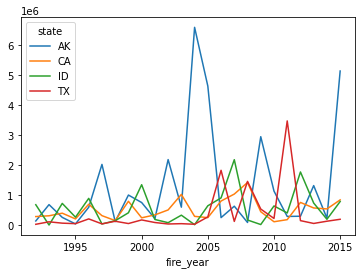

In [26]:
top_states.pivot(index='fire_year', columns='state', values='acres_burned').plot()

## How to use the pivot_table() method

In [27]:
states = ['AK','CA','ID','TX']
fires_top_4 = fires.query('state in @states')
fires_top_4 = fires_top_4.pivot_table(index='fire_year', columns='state', 
                                      values='acres_burned', aggfunc='sum')
fires_top_4.head(2)

state,AK,CA,ID,TX
fire_year,,,,
1992,142444.7,289254.9,683495.2,31500.3
1993,686630.5,315011.1,7658.5,114265.5


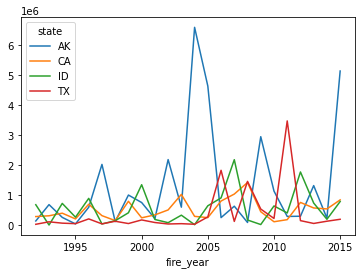

In [28]:
fires_top_4.plot()

## How to create bins of equal size

In [29]:
fires_filtered = fires.query('fire_year == 2010 and days_burning > 0').dropna()

In [30]:
pd.cut(fires_filtered.acres_burned, bins=4)

173229    (-296.103, 76535.75]
173230    (-296.103, 76535.75]
173231    (-296.103, 76535.75]
173232    (-296.103, 76535.75]
173233    (-296.103, 76535.75]
                  ...         
273969    (-296.103, 76535.75]
274046    (-296.103, 76535.75]
274049    (-296.103, 76535.75]
274081    (-296.103, 76535.75]
274116    (-296.103, 76535.75]
Name: acres_burned, Length: 1858, dtype: category
Categories (4, interval[float64, right]): [(-296.103, 76535.75] < (76535.75, 153061.5] <
                                           (153061.5, 229587.25] < (229587.25, 306113.0]]

In [31]:
pd.cut(fires_filtered.acres_burned, bins=[0,100000,200000,300000,400000])

173229    (0, 100000]
173230    (0, 100000]
173231    (0, 100000]
173232    (0, 100000]
173233    (0, 100000]
             ...     
273969    (0, 100000]
274046    (0, 100000]
274049    (0, 100000]
274081    (0, 100000]
274116    (0, 100000]
Name: acres_burned, Length: 1858, dtype: category
Categories (4, interval[int64, right]): [(0, 100000] < (100000, 200000] < (200000, 300000] <
                                         (300000, 400000]]

In [32]:
pd.cut(fires_filtered.acres_burned, bins=[0,100000,200000,300000,400000],
       labels=['small','medium','large','very large'])

173229    small
173230    small
173231    small
173232    small
173233    small
          ...  
273969    small
274046    small
274049    small
274081    small
274116    small
Name: acres_burned, Length: 1858, dtype: category
Categories (4, object): ['small' < 'medium' < 'large' < 'very large']

In [33]:
pd.cut(fires_filtered.acres_burned, bins=[0,100000,200000,300000,400000],
       labels=['small','medium','large','very large']).value_counts()

small         1855
medium           2
very large       1
large            0
Name: acres_burned, dtype: int64

## How to create bins with equal numbers of unique items

In [34]:
pd.qcut(fires_filtered.acres_burned, q=4,
        labels=['small','medium','large','very large'])

173229         small
173230    very large
173231    very large
173232         large
173233        medium
             ...    
273969         small
274046        medium
274049        medium
274081         small
274116        medium
Name: acres_burned, Length: 1858, dtype: category
Categories (4, object): ['small' < 'medium' < 'large' < 'very large']

In [35]:
pd.qcut(fires_filtered.acres_burned, q=4,
        labels=['small','medium','large','very large']).value_counts()

small         466
medium        465
very large    464
large         463
Name: acres_burned, dtype: int64

In [36]:
fires_filtered['fire_size'] = pd.qcut(fires_filtered.acres_burned, q=4,
    labels=['small','medium','large','very large'])

In [37]:
pd.qcut(fires_filtered.days_burning, q=4,
        labels=['short','medium','long'], duplicates='drop').value_counts()

short     1018
long       433
medium     407
Name: days_burning, dtype: int64

## How to plot the binned data

In [38]:
fires_filtered.head()

,fire_name,fire_year,state,discovery_date,contain_date,acres_burned,fire_month,days_burning,fire_size
173229,Fourmile Trail,2010,AK,2010-04-28,2010-05-05,16.8,4,7.0,small
173230,Granite Tors,2010,AK,2010-05-27,2010-08-11,7880.0,5,76.0,very large
173231,Goldbug Creek,2010,AK,2010-06-23,2010-06-28,2777.0,6,5.0,very large
173232,Broken Tree,2010,AK,2010-05-24,2010-07-08,112.0,5,45.0,large
173233,Folger Creek,2010,AK,2010-07-01,2010-07-16,90.0,7,15.0,medium


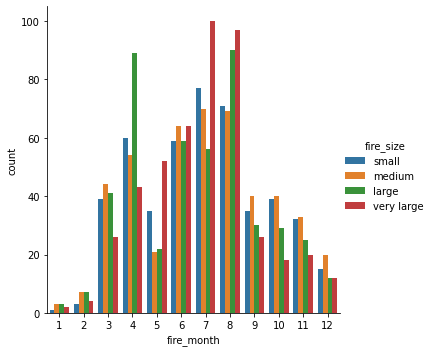

In [39]:
sns.catplot(data=fires_filtered, kind='count', x='fire_month', hue='fire_size')

## How to get the top n rows

In [40]:
cars.nlargest(n=6, columns='enginesize')

,aspiration,carbody,enginesize,curbweight,price
49,std,sedan,326,3950,36000.0
73,std,sedan,308,3900,40960.0
74,std,hardtop,304,3715,45400.0
47,std,sedan,258,4066,32250.0
48,std,sedan,258,4066,35550.0
71,std,sedan,234,3740,34184.0


In [41]:
cars.nlargest(n=6, columns=['enginesize','price'])

,aspiration,carbody,enginesize,curbweight,price
49,std,sedan,326,3950,36000.0
73,std,sedan,308,3900,40960.0
74,std,hardtop,304,3715,45400.0
48,std,sedan,258,4066,35550.0
47,std,sedan,258,4066,32250.0
72,std,convertible,234,3685,35056.0


## How to calculate percent change

In [42]:
df = fires[['state','fire_year','acres_burned']] \
    .groupby(['state','fire_year']).sum()
df.head()

acres_burned
state fire_year              
AK    1992           142444.7
      1993           686630.5
      1994           261604.7
      1995            43762.6
      1996           598407.2

In [43]:
df.pct_change()

acres_burned
state fire_year              
AK    1992                NaN
      1993           3.820330
      1994          -0.619002
      1995          -0.832715
      1996          12.673941
...                       ...
WY    2011           0.552941
      2012           2.582104
      2013          -0.888021
      2014          -0.866764
      2015           4.046849

[1148 rows x 1 columns]

## How to rank rows

In [44]:
df = fires.groupby('state').sum() \
    [['acres_burned','fire_year','days_burning']]
df.head(3)

,acres_burned,fire_year,days_burning
state,,,
AK,3.222601e+07,5683445,80268.0
AL,8.101628e+05,38336332,2886.0
AR,4.502221e+05,17960388,1132.0


In [45]:
df['acres_rank'] = df.acres_burned.rank(ascending=False)
df.head(3)

,acres_burned,fire_year,days_burning,acres_rank
state,,,,
AK,3.222601e+07,5683445,80268.0,1.0
AL,8.101628e+05,38336332,2886.0,23.0
AR,4.502221e+05,17960388,1132.0,27.0


In [46]:
df['days_rank'] = df.days_burning.rank(method='max')
df.sort_values('days_burning').head(4)

,acres_burned,fire_year,days_burning,acres_rank,days_rank
state,,,,,
RI,147.45,22092,0.0,51.0,1.0
VT,985.70,46240,6.0,50.0,3.0
CT,7358.20,364159,6.0,46.0,3.0
NH,1232.23,82240,9.0,49.0,4.0
